In [1]:
from pathlib import Path
import json
import pandas as pd
import numpy as np
import re
import ast
import pandas as pd


### Load in scores and outputs from step-beam

In [2]:
# Load and process the .jsonl file
def load_jsonl_extract_accuracy(jsonl_path):
    data = []

    with open(jsonl_path, "r") as f:
        for line in f:
            entry = json.loads(line)
            question = entry["problem"]
            score_list = entry["agg_scores"] 
            completion_tokens = entry["completion_tokens"]
            indicator_weighted_1 = entry["indicator_weighted@1"]
            indicator_naive_1 = entry["indicator_naive@1"]
            indicator_maj_1 = entry["indicator_maj@1"]
            indicator_weighted_2 = entry["indicator_weighted@2"]
            indicator_naive_2 = entry["indicator_naive@2"]
            indicator_maj_2 = entry["indicator_maj@2"]
            indicator_weighted_4 = entry["indicator_weighted@4"]
            indicator_naive_4 = entry["indicator_naive@4"]
            indicator_maj_4 = entry["indicator_maj@4"]
            indicator_weighted_8 = entry["indicator_weighted@8"]
            indicator_naive_8 = entry["indicator_naive@8"]
            indicator_maj_8 = entry["indicator_maj@8"]
            data.append({
                "question": question,
                "score": score_list,
                "score_list": score_list,
                "completion_tokens": completion_tokens,
                "indicator_weighted_1": indicator_weighted_1,
                "indicator_naive_1": indicator_naive_1,
                "indicator_maj_1": indicator_maj_1,
                "indicator_weighted_2": indicator_weighted_2,
                "indicator_naive_2": indicator_naive_2,
                "indicator_maj_2": indicator_maj_2,
                "indicator_weighted_4": indicator_weighted_4,
                "indicator_naive_4": indicator_naive_4,
                "indicator_maj_4": indicator_maj_4,
                "indicator_weighted_8": indicator_weighted_8,
                "indicator_naive_8": indicator_naive_8,
                "indicator_maj_8": indicator_maj_8
            })

    return pd.DataFrame(data)

In [3]:
df_N8 = load_jsonl_extract_accuracy("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_8/best_of_n_completions.jsonl")

In [4]:
df_N8.head()

,question,score,score_list,completion_tokens,indicator_weighted_1,indicator_naive_1,indicator_maj_1,indicator_weighted_2,indicator_naive_2,indicator_maj_2,indicator_weighted_4,indicator_naive_4,indicator_maj_4,indicator_weighted_8,indicator_naive_8,indicator_maj_8
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.99609375, 1.0, 1.0, 0.0101928711, 1.0,...","[1.0, 0.99609375, 1.0, 1.0, 0.0101928711, 1.0,...","[286, 197, 297, 218, 396, 203, 205, 194]",1,1,1,1,1,1,1,1,1,1,1,1
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",0,0,0,0,0,0,0,0,0,0,0,0
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[460, 445, 332, 452, 371, 390, 277, 439]",1,1,1,1,1,1,1,1,1,1,1,1
3,How many positive whole-number divisors does 1...,"[0.98828125, 0.0060119629, 1.0, 0.98828125, 0....","[0.98828125, 0.0060119629, 1.0, 0.98828125, 0....","[335, 401, 397, 386, 269, 299, 477, 445]",0,0,0,0,0,0,1,1,1,1,1,1
4,The results of a cross-country team's training...,"[0.88671875, 1.0, 0.9609375, 0.494140625, 0.10...","[0.88671875, 1.0, 0.9609375, 0.494140625, 0.10...","[354, 523, 350, 389, 391, 261, 365, 481]",0,0,0,1,1,0,1,1,1,1,1,1


In [5]:
# add column for question index.
df_N8["sb_idx"] = df_N8.index.tolist()

In [6]:
df_N8.head()

,question,score,score_list,completion_tokens,indicator_weighted_1,indicator_naive_1,indicator_maj_1,indicator_weighted_2,indicator_naive_2,indicator_maj_2,indicator_weighted_4,indicator_naive_4,indicator_maj_4,indicator_weighted_8,indicator_naive_8,indicator_maj_8,sb_idx
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.99609375, 1.0, 1.0, 0.0101928711, 1.0,...","[1.0, 0.99609375, 1.0, 1.0, 0.0101928711, 1.0,...","[286, 197, 297, 218, 396, 203, 205, 194]",1,1,1,1,1,1,1,1,1,1,1,1,0
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",0,0,0,0,0,0,0,0,0,0,0,0,1
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[460, 445, 332, 452, 371, 390, 277, 439]",1,1,1,1,1,1,1,1,1,1,1,1,2
3,How many positive whole-number divisors does 1...,"[0.98828125, 0.0060119629, 1.0, 0.98828125, 0....","[0.98828125, 0.0060119629, 1.0, 0.98828125, 0....","[335, 401, 397, 386, 269, 299, 477, 445]",0,0,0,0,0,0,1,1,1,1,1,1,3
4,The results of a cross-country team's training...,"[0.88671875, 1.0, 0.9609375, 0.494140625, 0.10...","[0.88671875, 1.0, 0.9609375, 0.494140625, 0.10...","[354, 523, 350, 389, 391, 261, 365, 481]",0,0,0,1,1,0,1,1,1,1,1,1,4


In [7]:
# pivot table.

# Columns to melt (indicators)
indicator_cols = [
    "indicator_weighted_1", "indicator_naive_1", "indicator_maj_1",
    "indicator_weighted_2", "indicator_naive_2", "indicator_maj_2",
    "indicator_weighted_4", "indicator_naive_4", "indicator_maj_4",
    "indicator_weighted_8", "indicator_naive_8", "indicator_maj_8"
]

# Melt the dataframe from wide to long
predictor_df = df_N8.melt(
    id_vars=['question', 'score', 'score_list', 'completion_tokens', 'sb_idx'],
    value_vars=indicator_cols,
    var_name='method_N',
    value_name='indicator'
)

# Extract method and N from 'method_N'
predictor_df[['drop', 'method', 'N']] = predictor_df['method_N'].str.extract(r'(indicator)_(\w+?)_(\d+)')
predictor_df.drop(columns=['method_N', 'drop'], inplace=True)

# Convert N to integer
predictor_df['N'] = predictor_df['N'].astype(int)

# Optional: reorder columns
predictor_df = predictor_df[['question', 'score', 'score_list', 'completion_tokens', 'sb_idx', 'method', 'N', 'indicator']]

# Show result
predictor_df.head()

,question,score,score_list,completion_tokens,sb_idx,method,N,indicator
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.99609375, 1.0, 1.0, 0.0101928711, 1.0,...","[1.0, 0.99609375, 1.0, 1.0, 0.0101928711, 1.0,...","[286, 197, 297, 218, 396, 203, 205, 194]",0,weighted,1,1
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,weighted,1,0
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[460, 445, 332, 452, 371, 390, 277, 439]",2,weighted,1,1
3,How many positive whole-number divisors does 1...,"[0.98828125, 0.0060119629, 1.0, 0.98828125, 0....","[0.98828125, 0.0060119629, 1.0, 0.98828125, 0....","[335, 401, 397, 386, 269, 299, 477, 445]",3,weighted,1,0
4,The results of a cross-country team's training...,"[0.88671875, 1.0, 0.9609375, 0.494140625, 0.10...","[0.88671875, 1.0, 0.9609375, 0.494140625, 0.10...","[354, 523, 350, 389, 391, 261, 365, 481]",4,weighted,1,0


In [9]:
predictor_df.head(10)

,question,score,score_list,completion_tokens,sb_idx,method,N,indicator
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.99609375, 1.0, 1.0, 0.0101928711, 1.0,...","[1.0, 0.99609375, 1.0, 1.0, 0.0101928711, 1.0,...","[286, 197, 297, 218, 396, 203, 205, 194]",0,weighted,1,1
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,weighted,1,0
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[460, 445, 332, 452, 371, 390, 277, 439]",2,weighted,1,1
3,How many positive whole-number divisors does 1...,"[0.98828125, 0.0060119629, 1.0, 0.98828125, 0....","[0.98828125, 0.0060119629, 1.0, 0.98828125, 0....","[335, 401, 397, 386, 269, 299, 477, 445]",3,weighted,1,0
4,The results of a cross-country team's training...,"[0.88671875, 1.0, 0.9609375, 0.494140625, 0.10...","[0.88671875, 1.0, 0.9609375, 0.494140625, 0.10...","[354, 523, 350, 389, 391, 261, 365, 481]",4,weighted,1,0
5,A regular hexagon can be divided into six equi...,"[0.9921875, 0.9921875, 1.0, 0.0124511719, 0.99...","[0.9921875, 0.9921875, 1.0, 0.0124511719, 0.99...","[265, 269, 183, 23, 274, 209, 189, 218]",5,weighted,1,0
6,What is the smallest positive perfect cube tha...,"[0.0698242188, 1.0, 1.0, 0.318359375, 0.988281...","[0.0698242188, 1.0, 1.0, 0.318359375, 0.988281...","[279, 281, 435, 716, 361, 450, 596, 326]",6,weighted,1,0
7,"The set of points $(x,y,z)$ that satisfy\n\[2x...","[1.0, 0.98828125, 0.91796875, 0.69921875, 0.79...","[1.0, 0.98828125, 0.91796875, 0.69921875, 0.79...","[330, 1226, 840, 1048, 617, 540, 724, 529]",7,weighted,1,1
8,"What is the distance, in units, between the po...","[0.9375, 0.9921875, 1.0, 1.0, 0.9921875, 0.980...","[0.9375, 0.9921875, 1.0, 1.0, 0.9921875, 0.980...","[232, 358, 212, 306, 281, 196, 203, 294]",8,weighted,1,1
9,The expression $2\cdot 3 \cdot 4\cdot 5+1$ is ...,"[0.72265625, 0.6640625, 1.0, 0.2060546875, 0.9...","[0.72265625, 0.6640625, 1.0, 0.2060546875, 0.9...","[334, 598, 538, 580, 800, 619, 867, 494]",9,weighted,1,0


In [8]:
# sanity check that melting worked correctly.
predictor_df[predictor_df["sb_idx"] == 1]

,question,score,score_list,completion_tokens,sb_idx,method,N,indicator
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,weighted,1,0
501,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,naive,1,0
1001,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,maj,1,0
1501,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,weighted,2,0
2001,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,naive,2,0
2501,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,maj,2,0
3001,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,weighted,4,0
3501,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,naive,4,0
4001,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,maj,4,0
4501,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,weighted,8,0


In [9]:
# # add token length.
# from transformers import AutoTokenizer

# # Load tokenizer (you can swap 'gpt2' for 'EleutherAI/gpt-neox-20b', etc.)
# tokenizer = AutoTokenizer.from_pretrained("gpt2")

# Compute token lengths
# predictor_df["question_length"] = predictor_df["question"].apply(lambda q: len(tokenizer.encode(q, add_special_tokens=False)))

# Compute length of string
predictor_df["question_length"] = predictor_df["question"].str.len()
predictor_df = pd.get_dummies(predictor_df, columns=["method"])

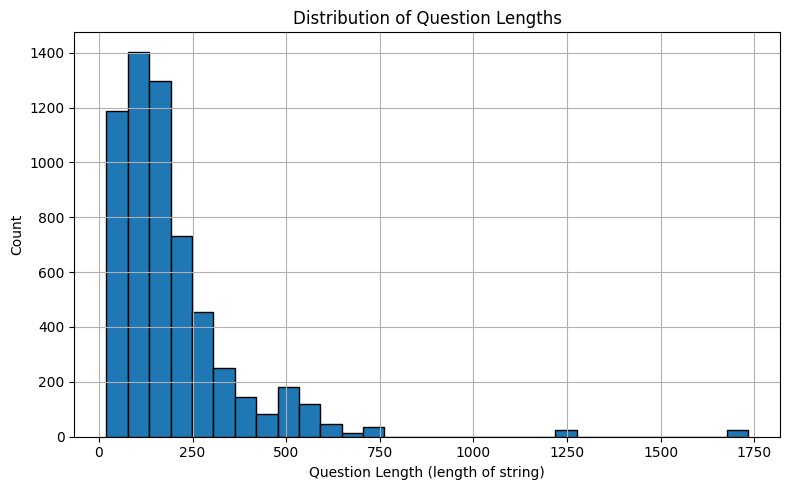

In [10]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(predictor_df["question_length"], bins=30, edgecolor='black')

plt.xlabel("Question Length (length of string)")
plt.ylabel("Count")
plt.title("Distribution of Question Lengths")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

## Plots of Accuracy

In [11]:
N_val = [1,2,4,8]
mv_accuracy = np.mean(df_N8["indicator_maj_1"]), np.mean(df_N8["indicator_maj_2"]), np.mean(df_N8["indicator_maj_4"]), np.mean(df_N8["indicator_maj_8"])
BoN_vanilla_accuracy = np.mean(df_N8["indicator_naive_1"]), np.mean(df_N8["indicator_naive_2"]), np.mean(df_N8["indicator_naive_4"]), np.mean(df_N8["indicator_naive_8"])
BoN_weighted_accuracy = np.mean(df_N8["indicator_weighted_1"]), np.mean(df_N8["indicator_weighted_2"]), np.mean(df_N8["indicator_weighted_4"]), np.mean(df_N8["indicator_weighted_8"])
df_accuracy = pd.DataFrame({
    "N": N_val,
    "majority_vote": mv_accuracy,
    "BoN_vanilla": BoN_vanilla_accuracy,
    "BoN_weighted": BoN_weighted_accuracy
})

In [12]:
df_accuracy.head()

,N,majority_vote,BoN_vanilla,BoN_weighted
0,1,0.352,0.352,0.352
1,2,0.352,0.460,0.460
2,4,0.478,0.546,0.550
3,8,0.542,0.584,0.600


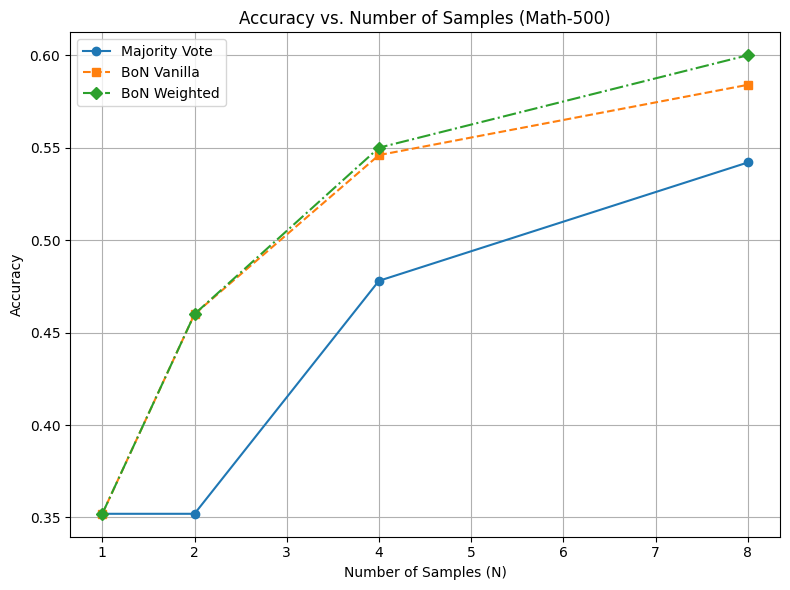

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Create scatter plot of accuracy vs. number of samples
plt.figure(figsize=(8, 6))
plt.plot(df_accuracy["N"], df_accuracy["majority_vote"], 'o-', label="Majority Vote")
plt.plot(df_accuracy["N"], df_accuracy["BoN_vanilla"], 's--', label="BoN Vanilla")
plt.plot(df_accuracy["N"], df_accuracy["BoN_weighted"], 'D-.', label="BoN Weighted")

# Formatting
plt.xlabel("Number of Samples (N)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Samples (Math-500)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### Prepare Features for Difficulty Probe.

In [55]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from transformers import BertTokenizer, BertModel

In [56]:
print("CUDA available:", torch.cuda.is_available())
print("CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: False
CUDA device name: No GPU


In [16]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [57]:
local_model_path = "/u/jhjenny9/.cache/huggingface/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594"
tokenizer = BertTokenizer.from_pretrained(local_model_path)
model = BertModel.from_pretrained(local_model_path).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [18]:
device = model.device  # Set device to match model
device

device(type='cpu')

In [58]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
def get_cls_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token is at position 0
    return cls_embedding.squeeze().numpy()

In [59]:
# Create train/test split based on 'sb_idx' (query identifier)
from sklearn.model_selection import train_test_split

unique_sb_idx = predictor_df['sb_idx'].unique()

# Split sb_idx into train/test
sb_idx_train, sb_idx_test = train_test_split(
    unique_sb_idx,
    test_size=0.15,
    random_state=6
)

# Divide queries (represented by sb_idx) into train and test sets
df_train = predictor_df[predictor_df['sb_idx'].isin(sb_idx_train)].reset_index(drop=True)
df_test = predictor_df[predictor_df['sb_idx'].isin(sb_idx_test)].reset_index(drop=True)

In [60]:
df_train.head()

,question,score,score_list,completion_tokens,sb_idx,N,indicator,question_length,method_maj,method_naive,method_weighted
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.99609375, 1.0, 1.0, 0.0101928711, 1.0,...","[1.0, 0.99609375, 1.0, 1.0, 0.0101928711, 1.0,...","[286, 197, 297, 218, 396, 203, 205, 194]",0,1,1,161,False,False,True
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[0.3515625, 0.640625, 0.0986328125, 0.00659179...","[775, 944, 1244, 611, 809, 537, 2048, 700]",1,1,0,217,False,False,True
2,How many positive whole-number divisors does 1...,"[0.98828125, 0.0060119629, 1.0, 0.98828125, 0....","[0.98828125, 0.0060119629, 1.0, 0.98828125, 0....","[335, 401, 397, 386, 269, 299, 477, 445]",3,1,0,54,False,False,True
3,The results of a cross-country team's training...,"[0.88671875, 1.0, 0.9609375, 0.494140625, 0.10...","[0.88671875, 1.0, 0.9609375, 0.494140625, 0.10...","[354, 523, 350, 389, 391, 261, 365, 481]",4,1,0,731,False,False,True
4,A regular hexagon can be divided into six equi...,"[0.9921875, 0.9921875, 1.0, 0.0124511719, 0.99...","[0.9921875, 0.9921875, 1.0, 0.0124511719, 0.99...","[265, 269, 183, 23, 274, 209, 189, 218]",5,1,0,177,False,False,True


In [61]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
get_cls_embedding(df_train['question'][2])

array([-1.76401600e-01, -1.48174480e-01,  2.22301528e-01,  1.52108818e-01,
       -3.42226148e-01, -7.65725821e-02,  4.27999794e-01,  6.90518394e-02,
       -2.21838087e-01,  1.79975629e-01,  1.13173081e-02, -5.65343201e-01,
       -1.75141841e-01, -7.72363171e-02,  5.17583191e-01,  2.74820149e-01,
       -1.25903741e-01,  3.44920903e-01,  1.72381803e-01, -7.73648471e-02,
        3.00567657e-01,  8.19658712e-02, -7.45342970e-02, -5.73225141e-01,
       -5.10017239e-02,  1.77629590e-01,  3.92320007e-01, -8.75069499e-01,
        2.88651079e-01,  5.86677909e-01, -1.79270059e-01,  2.54440039e-01,
       -2.40541548e-01, -4.95002896e-01,  5.07961333e-01, -3.25099140e-01,
        5.71518600e-01,  8.41247439e-02,  5.40505290e-01, -7.89159685e-02,
       -6.18104935e-01, -3.73342186e-01,  2.25300014e-01,  1.51836574e-01,
       -2.57983774e-01, -6.83261454e-01, -3.30432034e+00, -1.73675671e-01,
       -3.36462051e-01, -2.17025965e-01, -9.57445726e-02,  2.08571717e-01,
        1.81199670e-01,  

In [2]:
# (Training Data) Extract features: CLS + decoding parameters
cls_features = []
for _, row in df_train.iterrows():
    cls_vec = get_cls_embedding(row["question"])
    num_samples = row["N"]
    question_length = row["question_length"]
    method_maj = row["method_maj"]
    method_naive = row["method_naive"]
    method_weighted = row["method_weighted"]
    
    features = np.concatenate([cls_vec, [num_samples, question_length, method_maj, method_naive, method_weighted]]) 
    cls_features.append(features)

# # Scaling factors
# NUM_SAMPLES_SCALE = 1.0 
# QUESTION_LENGTH_SCALE = 1.0
# METHOD_SCALE = 1.0

# for _, row in df_train.iterrows():
#     cls_vec = get_cls_embedding(row["question"])  # e.g., shape (768,)
    
#     # Scalar features
#     # num_samples = row["N"] * NUM_SAMPLES_SCALE
#     question_length = row["question_length"] * QUESTION_LENGTH_SCALE
#     # method_maj = row["method_maj"] * METHOD_SCALE
#     # method_naive = row["method_naive"] * METHOD_SCALE
#     # method_weighted = row["method_weighted"] * METHOD_SCALE

#     # Concatenate features
#     features = np.concatenate([
#         cls_vec, 
#         [question_length] # , method_maj, method_naive, method_weighted
#     ]) 

#     cls_features.append(features)

NameError: name 'df_train' is not defined

In [63]:
X_train = np.array(cls_features)
y_train = df_train["indicator"].values.astype(int)

### Plotting Feature Importance.

In [ ]:
# Optional: split high-dimensional CLS and interpretable features
cls_dim = len(cls_vec)
cls_part = X_train[:, :cls_dim]
named_features = pd.DataFrame(
    X_train[:, cls_dim:],  # shape (n_samples, 5)
    columns=["num_samples", "question_length", "method_maj", "method_naive", "method_weighted"]
)

In [ ]:
for col in named_features.columns:
    sns.boxplot(x=y, y=named_features[col])
    plt.title(f"{col} by Target")
    plt.xlabel("Target class")
    plt.ylabel(col)
    plt.show()

In [64]:
# (Testing Data) Extract features: CLS + decoding parameters
cls_features = []
# param_features = []
for _, row in df_test.iterrows():
#     cls_vec = get_cls_embedding(row["question"])
#     num_samples = row["N"]
#     method_maj = row["method_maj"]
#     method_naive = row["method_naive"]
#     method_weighted = row["method_weighted"]
    question_length = row["question_length"]
    
#     features = np.concatenate([cls_vec, [num_samples, question_length, method_maj, method_naive, method_weighted]]) 
#     cls_features.append(features)

NUM_SAMPLES_SCALE = 1.0   # boost num_samples
QUESTION_LENGTH_SCALE = 1.0
METHOD_SCALE = 1.0

for _, row in df_test.iterrows():
    cls_vec = get_cls_embedding(row["question"])  # e.g., shape (768,)
    
    # Scalar features
    # num_samples = row["N"] * NUM_SAMPLES_SCALE
    question_length = row["question_length"] * QUESTION_LENGTH_SCALE
    # method_maj = row["method_maj"] * METHOD_SCALE
    # method_naive = row["method_naive"] * METHOD_SCALE
    # method_weighted = row["method_weighted"] * METHOD_SCALE

    # Concatenate features
    features = np.concatenate([
        cls_vec, 
        [question_length] # , method_maj, method_naive, method_weighted
    ]) 

    cls_features.append(features)

In [65]:
X_test = np.array(cls_features)
# y_test = df_test["majority_true"].values.astype(int)
y_test = df_test["indicator"].values.astype(int)

### Train MLP.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [67]:
# X_array = np.array(X)
# y_array = np.array(y)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test) 

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=6)

In [68]:
# 2-layer MLP Binary Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [69]:
print(f"Binary Classification Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

Binary Classification Accuracy: 0.6456
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       439
           1       0.66      0.62      0.64       461

    accuracy                           0.65       900
   macro avg       0.65      0.65      0.65       900
weighted avg       0.65      0.65      0.65       900



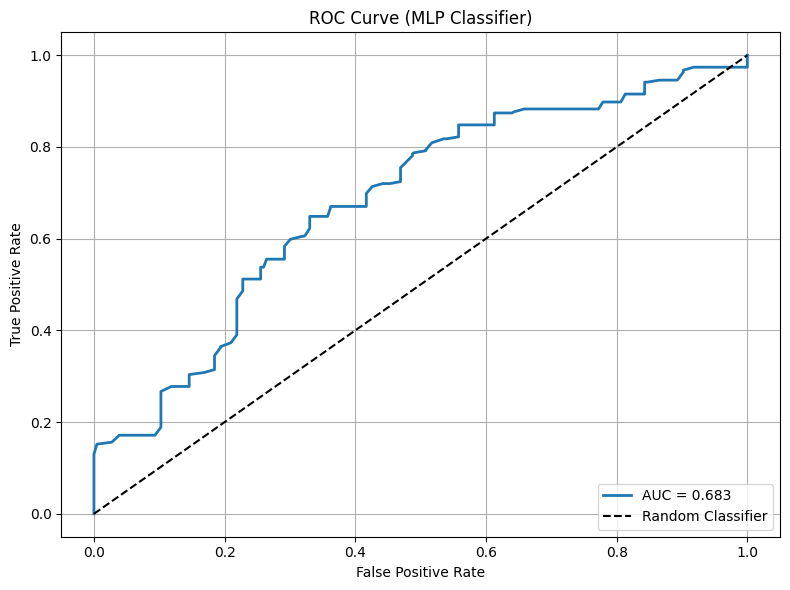

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_proba = mlp_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MLP Classifier)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
# plt.show()

# plt.savefig("figs/roc_all_mlp.png")

### Train XGBoost Classifier

In [72]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:57:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [73]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Binary Classification Accuracy: {acc:.4f}")

Binary Classification Accuracy: 0.6411


In [ ]:
# compute AUC
# Get predicted probabilities for the positive class (label 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

AUC: 0.6907


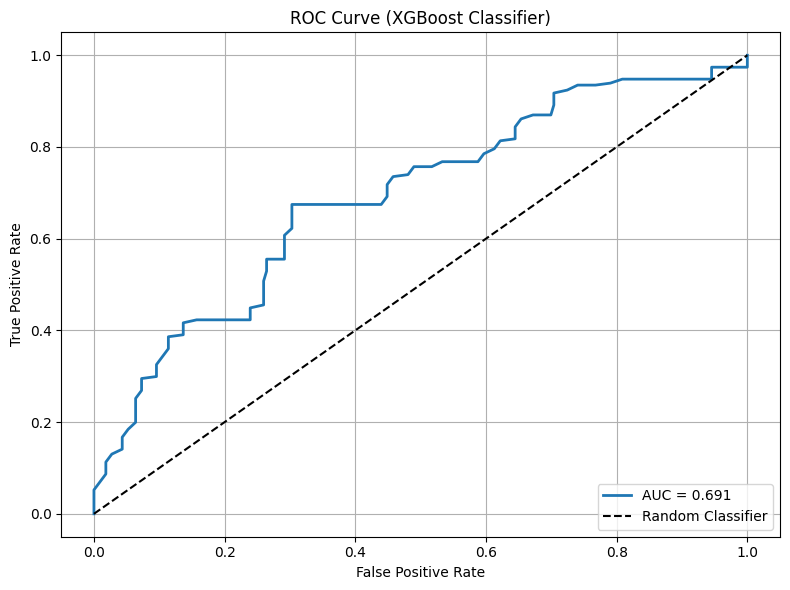

In [75]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost Classifier)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

In [53]:
import shap

explainer = shap.Explainer(model, X_train)     # TreeExplainer under the hood
shap_values = explainer(X_test)               # SHAP values for each sample

In [ ]:
# Example: get SHAP values for 'beam'
beam_shap_values = shap_values.values[:, -2]
sample_shap_values = shap_values.values[:, -1]

# Summary statistics
print(f"Mean SHAP value for 'beam': {beam_shap_values.mean():.4f}")
print(f"Mean SHAP value for 'max samples': {sample_shap_values.mean():.4f}")

In [44]:
y_proba = mlp_clf.predict_proba(X_test)[:, 1]

In [45]:
y_proba.shape

(900,)

In [46]:
df_test['predicted_prob'] = y_proba

In [47]:
df_test.head(5)

,question,score,score_list,completion_tokens,sb_idx,N,indicator,question_length,method_maj,method_naive,method_weighted,predicted_prob
0,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[460, 445, 332, 452, 371, 390, 277, 439]",2,1,1,113,False,False,True,0.206888
1,What is the least positive integer multiple of...,"[0.0042724609, 0.0834960938, 0.12109375, 0.001...","[0.0042724609, 0.0834960938, 0.12109375, 0.001...","[368, 242, 239, 436, 1397, 354, 585, 548]",10,1,0,99,False,False,True,0.000068
2,"The proper divisors of 12 are 1, 2, 3, 4 and 6...","[0.984375, 0.66796875, 0.166015625, 0.9765625,...","[0.984375, 0.66796875, 0.166015625, 0.9765625,...","[252, 382, 396, 900, 379, 247, 313, 257]",12,1,0,215,False,False,True,0.004700
3,The volume of the cylinder shown is $45\pi$ cu...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[246, 198, 289, 214, 270, 177, 226, 242]",13,1,1,384,False,False,True,0.006269
4,A $90^\circ$ rotation around the origin in the...,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.72265625, 1.0, 0.6...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.72265625, 1.0, 0.6...","[498, 349, 196, 359, 276, 523, 330, 162]",28,1,1,137,False,False,True,0.303832


In [48]:
df_test['predicted_prob']

0      0.206888
1      0.000068
2      0.004700
3      0.006269
4      0.303832
         ...   
895    0.458007
896    0.413771
897    0.000051
898    0.970997
899    0.365527
Name: predicted_prob, Length: 900, dtype: float64

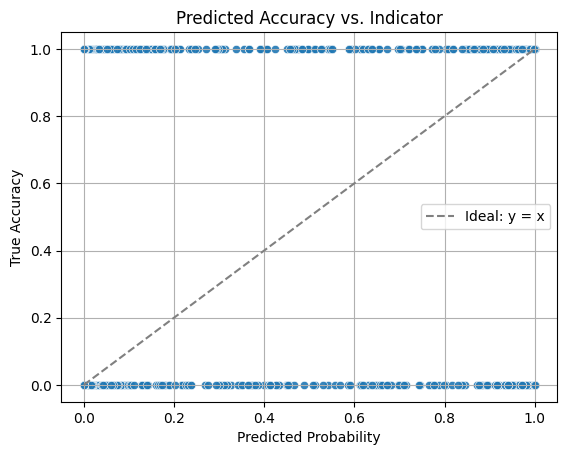

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='predicted_prob', y='indicator', data=df_test, alpha=0.9)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideal: y = x')
plt.xlabel('Predicted Probability')
plt.ylabel('True Accuracy')
plt.title('Predicted Accuracy vs. Indicator')
plt.legend()
plt.grid(True)
# plt.show()

# plt.savefig("figs/messy_acc_prediction", dpi=300, bbox_inches='tight')

In [ ]:
# there should be 12 different BoN configurations for each query in the test set.
df_test.groupby('sb_idx').size().reset_index(name='count')

,sb_idx,count
0,2,12
1,10,12
2,12,12
3,13,12
4,28,12
...,...,...
70,474,12
71,478,12
72,480,12
73,486,12


In [ ]:
df_test # you would need to get the accuracies for each configuration.
# completion token.

,question,score,score_list,completion_tokens,sb_idx,N,indicator,question_length,method_maj,method_naive,method_weighted,predicted_prob
0,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0]","[460, 445, 332, 452, 371, 390, 277, 439]",2,1,1,113,False,False,True,0.206888
1,What is the least positive integer multiple of...,"[0.0042724609, 0.0834960938, 0.12109375, 0.001...","[0.0042724609, 0.0834960938, 0.12109375, 0.001...","[368, 242, 239, 436, 1397, 354, 585, 548]",10,1,0,99,False,False,True,0.000068
2,"The proper divisors of 12 are 1, 2, 3, 4 and 6...","[0.984375, 0.66796875, 0.166015625, 0.9765625,...","[0.984375, 0.66796875, 0.166015625, 0.9765625,...","[252, 382, 396, 900, 379, 247, 313, 257]",12,1,0,215,False,False,True,0.004700
3,The volume of the cylinder shown is $45\pi$ cu...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[246, 198, 289, 214, 270, 177, 226, 242]",13,1,1,384,False,False,True,0.006269
4,A $90^\circ$ rotation around the origin in the...,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.72265625, 1.0, 0.6...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.72265625, 1.0, 0.6...","[498, 349, 196, 359, 276, 523, 330, 162]",28,1,1,137,False,False,True,0.303832
...,...,...,...,...,...,...,...,...,...,...,...,...
895,Find the value of $\log_2{3} \cdot \log_3{4} \...,"[0.0212402344, 0.0864257812, 1.0, 1.0, 1.0, 1....","[0.0212402344, 0.0864257812, 1.0, 1.0, 1.0, 1....","[611, 1060, 536, 632, 640, 627, 459, 622]",474,8,1,110,True,False,False,0.458007
896,Find the sum of all complex solutions of the e...,"[0.9765625, 0.0698242188, 0.83984375, 0.001068...","[0.9765625, 0.0698242188, 0.83984375, 0.001068...","[1358, 638, 983, 1176, 862, 1055, 488, 620]",478,8,0,148,True,False,False,0.413771
897,Let $\omega$ be a complex number such that $\o...,"[0.0142822266, 0.0615234375, 0.8125, 1.0, 0.81...","[0.0142822266, 0.0615234375, 0.8125, 1.0, 0.81...","[765, 726, 539, 1049, 926, 841, 382, 565]",480,8,1,189,True,False,False,0.000051
898,A steel sphere with a 3-inch radius is made by...,"[1.0, 1.0, 1.0, 0.99609375, 0.99609375, 0.9609...","[1.0, 1.0, 1.0, 0.99609375, 0.99609375, 0.9609...","[196, 180, 251, 422, 360, 449, 444, 15]",486,8,1,186,True,False,False,0.970997


In [ ]:
# get the average accuracy and avg_cot_token_count for each configuration of step-beam that was run.
config_summary_df = df_test.groupby(["N", "method_maj", "method_naive", "method_weighted"])[
    ["accuracy", "avg_cot_token_count"]
].mean().reset_index()

In [51]:
config_summary_df.head()

NameError: name 'config_summary_df' is not defined

In [141]:
df_sorted = df_test.sort_values(by="sb_idx")
df_sorted.head(5)

,question,score,accuracy,beam_size,beam_width,chunk_size,sb_idx,sb_generated_token_count,avg_cot_token_count,average_step,question_length,50%_beam_length,average_step_final,majority_true,predicted_prob
0,Victor initially had 35.5 books. During the bo...,"[True, True, True, True]",1.000000,2,2,64,2,1062,265.50000,"[5, 5]",290,5,5,1,0.598889
400,Victor initially had 35.5 books. During the bo...,"[True, True, True, True, True, True, True, Tru...",1.000000,8,4,256,2,6953,217.28125,"[1, 2]",290,1,2,1,0.946578
100,Victor initially had 35.5 books. During the bo...,"[True, True, True, True, True, True, True, Tru...",1.000000,4,4,128,2,3920,245.00000,"[2, 3]",290,2,3,1,0.560596
300,Victor initially had 35.5 books. During the bo...,"[True, True, True, True, True, True, True, Tru...",0.828125,32,2,128,2,14650,228.90625,"[2, 3]",290,2,3,1,0.533755
200,Victor initially had 35.5 books. During the bo...,"[True, True, True, True, True, True, True, Tru...",0.937500,8,2,256,2,3542,221.37500,"[1, 2]",290,1,2,1,0.890143


### Optimal-Utility Router

$$\text{Utility}(x, m) = \hat{a}_m(x) - \lambda \cdot \text{Cost}_m(x)$$

$$\text{Query-adaptive}(x, m) = \argmax_m \; \text{Utility}(x, m)

Input: A dataframe that contains rows for different settings (beam size, beam width, chunk size, etc.) and includes: an accuracy column, an avg_cot_token_count column (which is the cost), and a sb_idx column (which is the query).

A parameter, lambda, that controls how much the user is willing to tradeoff accuracy and cost.

For each group (i.e., all rows of the same query, or sb_idx):

It computes a utility value for each row:

$$\text{Utility}(x, m) = \hat{a}_m(x) - \lambda \cdot \text{Cost}_m(x)$$

It finds the row with the highest utility in that group.

Output:
A new DataFrame where each row corresponds to a query and contains:
the best utility found, the accuracy, and cost for that best-performing configuration.

In [ ]:
def compute_max_utility_pred(df, lambda_):
    def get_max_utility(group):
        group = group.copy()
        group["utility"] = group["predicted_prob"] - lambda_ * group["avg_cot_token_count"]
        idx_max = group["utility"].idxmax()
        return pd.Series({
            "max_utility": group.loc[idx_max, "utility"],
            "max_predicted_prob": group.loc[idx_max, "predicted_prob"],
            "accuracy": group.loc[idx_max, "accuracy"],
            "max_cost": group.loc[idx_max, "avg_cot_token_count"]
        })

    result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
    return result_df

In [143]:
# Sweep over lambda values
lambda_values = np.logspace(-5, 1, num=30)
lambda_values

array([1.00000000e-05, 1.61026203e-05, 2.59294380e-05, 4.17531894e-05,
       6.72335754e-05, 1.08263673e-04, 1.74332882e-04, 2.80721620e-04,
       4.52035366e-04, 7.27895384e-04, 1.17210230e-03, 1.88739182e-03,
       3.03919538e-03, 4.89390092e-03, 7.88046282e-03, 1.26896100e-02,
       2.04335972e-02, 3.29034456e-02, 5.29831691e-02, 8.53167852e-02,
       1.37382380e-01, 2.21221629e-01, 3.56224789e-01, 5.73615251e-01,
       9.23670857e-01, 1.48735211e+00, 2.39502662e+00, 3.85662042e+00,
       6.21016942e+00, 1.00000000e+01])

In [ ]:
results = []

for lambda_value in lambda_values:
    max_config = compute_max_utility_pred(df_test, lambda_value)
    avg_predicted_prob = max_config["max_predicted_prob"].mean()
    avg_max_cost = max_config["max_cost"].mean()
    avg_accuracy = max_config["accuracy"].mean()
    results.append({
        "lambda": lambda_value,
        "avg_predicted_prob": avg_predicted_prob,
        "accuracy": avg_accuracy,
        "avg_max_cost": avg_max_cost
    })

query_adaptive_df = pd.DataFrame(results)

In [148]:
query_adaptive_df.head()

,lambda,avg_predicted_prob,accuracy,avg_max_cost
0,0.000010,0.622125,0.613906,652.595469
1,0.000016,0.622100,0.615156,650.658281
2,0.000026,0.622021,0.611875,647.088281
3,0.000042,0.621822,0.608281,640.394063
4,0.000067,0.621086,0.604844,625.999063


In [149]:
config_summary_df

,beam_size,beam_width,chunk_size,accuracy,avg_cot_token_count
0,2,2,64,0.535000,567.032500
1,4,4,128,0.594375,697.649375
2,8,2,256,0.571250,713.404375
3,8,4,256,0.615000,701.789375
4,32,2,128,0.600469,672.172812


In [ ]:
# rename query df columns to match the config_summary_df
query_renamed = query_adaptive_df.rename(columns={
    "avg_max_cost": "avg_cot_token_count"
})

# outer join on the shared columns ("accuracy", "avg_cot_token_count")
query_optimal_static_df = pd.merge(
    query_renamed,
    config_summary_df,
    on=["accuracy", "avg_cot_token_count"],
    how="outer"
)

# change NaN to -1 for plotting purposes.
query_optimal_static_df = query_optimal_static_df.fillna(-1)

In [159]:
query_optimal_static_df.head()

,lambda,avg_predicted_prob,accuracy,avg_cot_token_count,beam_size,beam_width,chunk_size
0,-1.000000,-1.000000,0.535000,567.032500,2.0,2.0,64.0
1,0.020434,0.525733,0.567656,542.549219,-1.0,-1.0,-1.0
2,-1.000000,-1.000000,0.571250,713.404375,8.0,2.0,256.0
3,0.032903,0.494015,0.571406,541.304062,-1.0,-1.0,-1.0
4,0.137382,0.478549,0.572031,541.000312,-1.0,-1.0,-1.0


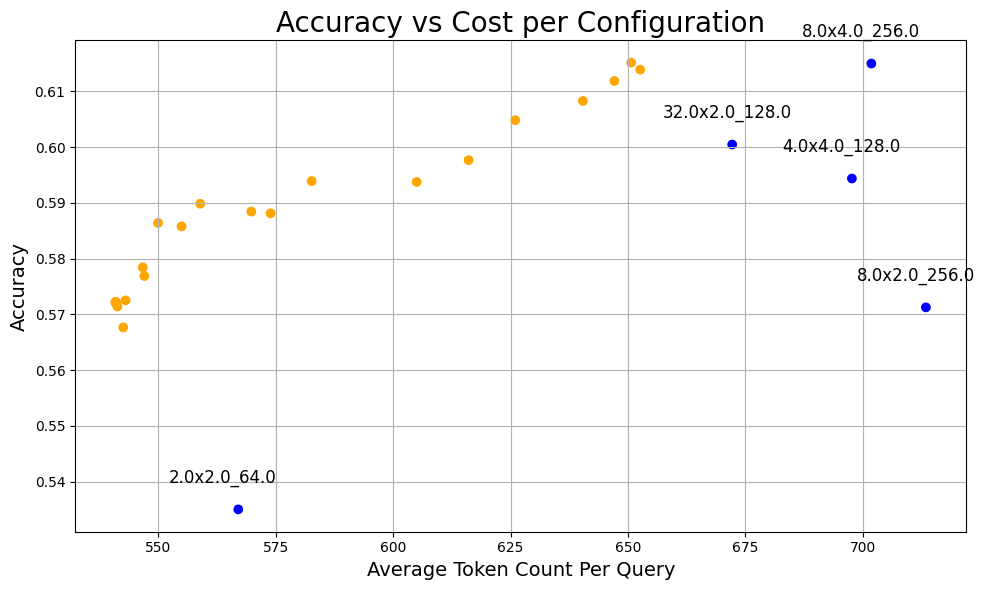

In [ ]:
import matplotlib.pyplot as plt

# Create color labels and text labels
colors = ['orange' if (row['beam_size'], row['beam_width'], row['chunk_size']) == (-1, -1, -1) else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['beam_size'], row['beam_width'], row['chunk_size']) == (-1, -1, -1) # f"{round(row['lambda'],5)}"
               else f"{row['beam_size']}x{row['beam_width']}_{row['chunk_size']}"
               for _, row in query_optimal_static_df.iterrows()]

plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["avg_cot_token_count"], query_optimal_static_df["accuracy"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["avg_cot_token_count"][i], query_optimal_static_df["accuracy"][i]),
                    textcoords="offset points", xytext=(-50, 19), ha='left', fontsize=12)
    # else:
    #     plt.annotate(label,
    #                 query_optimal_static_df["lambda"][i],
    #                 textcoords="offset points", xytext=(0, 0), ha='bottom', fontsize=3, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration", fontsize=20)
plt.grid(True)
plt.tight_layout()

# plt.savefig("figs/accuracy_vs_cost_by_config3", dpi=300, bbox_inches='tight')

### Train XGBoost Classifier

In [95]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:46:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [96]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Binary Classification Accuracy: {acc:.4f}")

Binary Classification Accuracy: 0.6980


In [97]:
# compute AUC
# Get predicted probabilities for the positive class (label 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

AUC: 0.7474


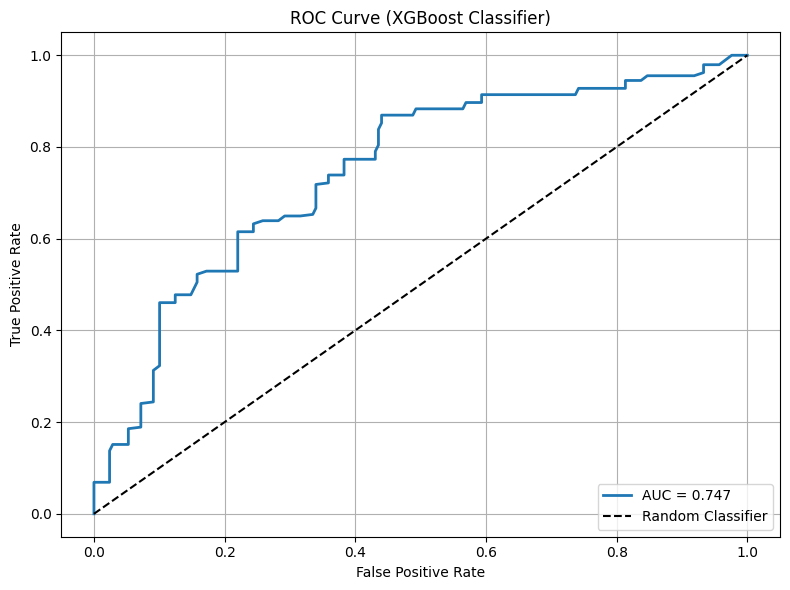

In [98]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost Classifier)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
# plt.show()

# plt.savefig("figs/roc_all_xgboost.png")
# plt.savefig("figs/roc_all_xgboost_5configs.png")

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test) # SHAP values for each sample

In [ ]:
### get SHAP values for hyperparameter predictors.
beam_size_shap = shap_values.values[:, -6]
beam_width_shap = shap_values.values[:, -5]
chunk_size_shap= shap_values.values[:, -4]
question_length_shap = shap_values.values[:, -2]
num_samples_shap = shap_values.values[:, -1]

# Summary statistics
print(f"Mean SHAP value for 'beam size': {beam_size_shap.mean():.4f}")
print(f"Mean SHAP value for 'beam width': {beam_width_shap.mean():.4f}")
print(f"Mean SHAP value for 'chunk size': {chunk_size_shap.mean():.4f}")
print(f"Mean SHAP value for 'question length': {question_length_shap.mean():.4f}")
print(f"Mean SHAP value for 'num samples': {num_samples_shap.mean():.4f}")

Mean SHAP value for 'beam size': 0.0167
Mean SHAP value for 'beam width': 0.0400
Mean SHAP value for 'chunk size': -0.0248
Mean SHAP value for '50% beam length': 0.0092
Mean SHAP value for 'question length': 0.0634
Mean SHAP value for 'num samples': 0.3573


In [53]:
import numpy as np

shap_array = shap_values.values  # shape: (n_samples, n_features)
# Mean SHAP across first k features for each sample
mean_shap_CLS = shap_array[:, :768].mean(axis=1)

# Optional: get global mean across all samples
global_mean_shap_CLS = mean_shap_CLS.mean()
print(f"Mean SHAP value for CLS feature: {global_mean_shap_CLS:.4f}")

Mean SHAP value for CLS feature: 0.0008
